# Machine learning 1 final project
## Group 6

## Zoo Animal Classification

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [197]:
animal = pd.read_csv('zoo.csv')
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [198]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [199]:
#check if there is null value
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [200]:
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [201]:
duplicates = animal.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [202]:
#check if there are duplicates in animal_name
duplicates = animal.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [203]:
#select these duplicates frog to see the data

frog = animal.loc[animal['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [204]:
#find that one frog is venomous and another one is not
#change the venomous one into venoumous_frog to seperate 2 kinds of frog
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "venoumous_frog"

/Users/Yijia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
# Join animal table and class table to show actual class names
ani_class = pd.read_csv('class.csv')
df = pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


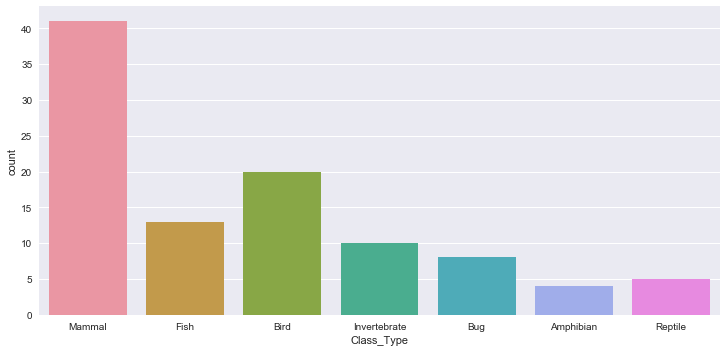

In [206]:
#use seaborn to plot the number of each class_type
import seaborn as sns
sns.factorplot('Class_Type', data=df, kind="count",size = 5,aspect = 2)

In [207]:
#train test split into 80/20
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

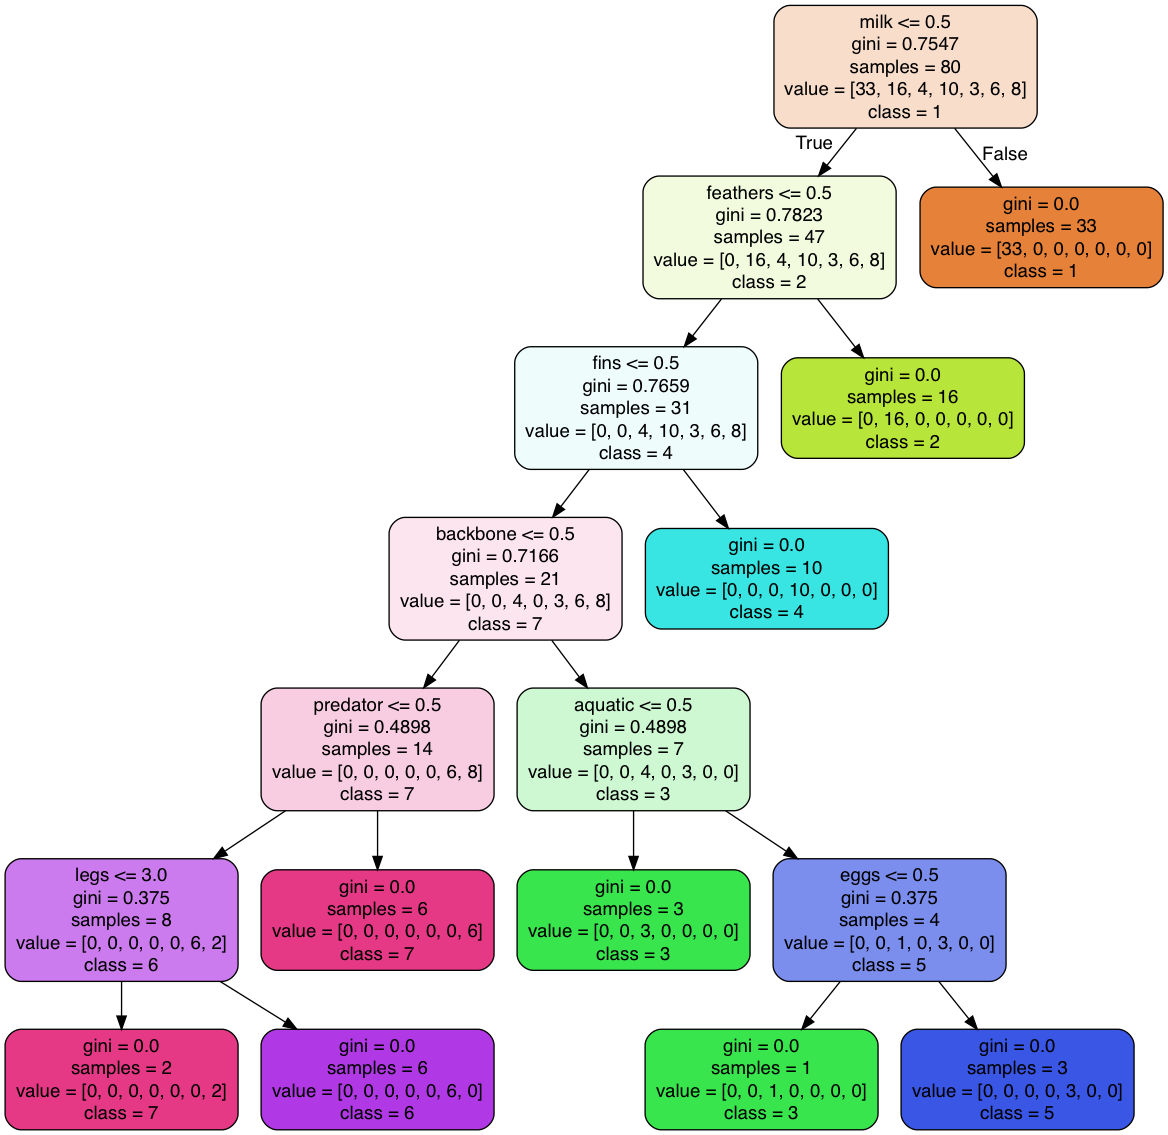

In [208]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(X_test)

# Get precision, recall, fscore, and support
fscores=[]
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_DecisionTreeClassifier, average='micro')
fscores.append(fscore)

global tree  
# Get the tree
tree = []
tree = clf

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 



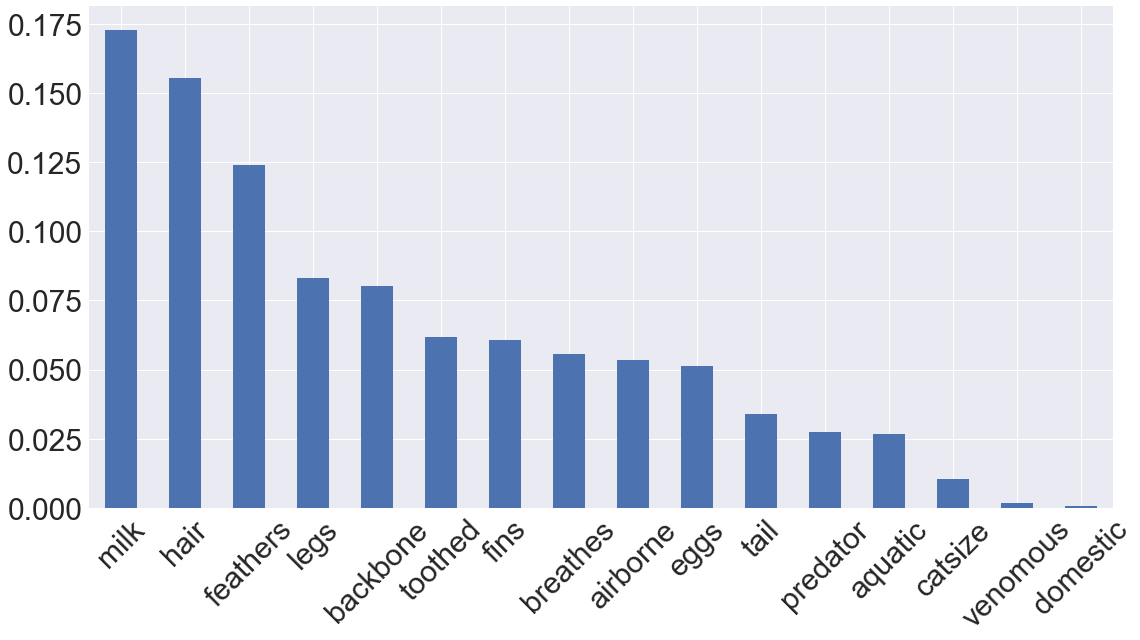

In [209]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=20)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
# Get precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_RandomForestClassifier, average='micro')
fscores.append(fscore)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [210]:
fscores

[0.95238095238095233, 1.0]

In [211]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the model
clf.fit(X_train, y_train)
y_pred_Perceptron = clf.predict(X_test)
# Get precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_Perceptron, average='micro')
fscores.append(fscore)

In [212]:
from sklearn.svm import SVC

# Declare the model
svm = SVC(kernel='linear', C=1, random_state=0)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Get precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_svm, 
                                                                     average='micro')
fscores.append(fscore)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=8)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)
# Get precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_KNeighborsClassifier, average='micro')
fscores.append(fscore)

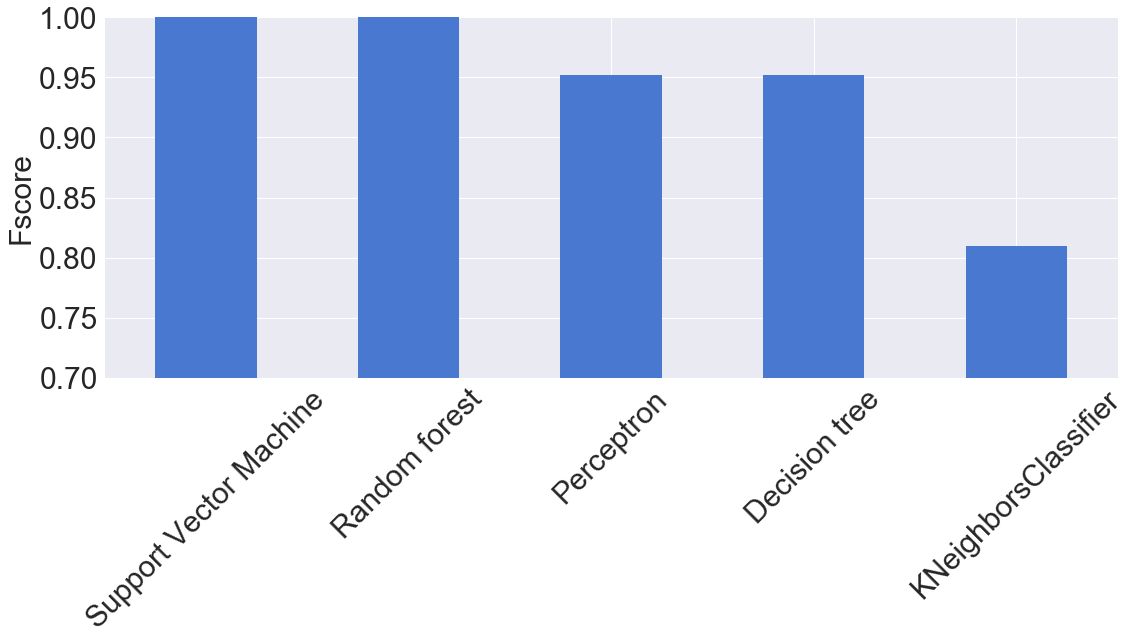

In [216]:
# Convert the fscores into one-dimensional 1darray with corresponding classifier names as axis labels
#clfs =  ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
#                                  'KNeighborsClassifier']
clf_fscores = pd.Series(fscores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

# Sort the array in descending order of the fscores
clf_fscores.sort_values(ascending=False, inplace=True)

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_fscores.plot(x='Classifiers', y='Fscores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Fscore', fontsize=30)
plt.ylim([0.70,1])
# Show the plot
#plt.colorbar()
plt.tight_layout()
plt.show()
